<div class="alert alert-block alert-info">
    <b><h1>ENGR 1330 Computational Thinking with Data Science </h1></b> 
</div> 

Copyright © 2021 Theodore G. Cleveland and Farhang Forghanparast

Last GitHub Commit Date: 

# 32: Logistic Regression 
- Concept of ...
- Training (a model fitting analog)	

:::{warning}
This lesson is under construction, the scripts work, but narrative is incomplete.

## Background

## Single Variable Models

Future lesson

## Multiple Variable Models

Logistic regression is trying to fit the following data model

$$Y_{obs} = \frac{e^{\bf{\beta}^TX}}{1 + e^{\bf{\beta}^TX}} + \epsilon$$<br>

<!--$Y_{mod} = \frac{e^{\bf{\beta}^TX}}{1 + e^{\bf{\beta}^TX}}$<br>-->

where

$$\begin{gather}
\mathbf{\beta}=
\begin{pmatrix}
\beta_0 \\
\beta_1 \\
\vdots \\
\beta_m \\
\end{pmatrix}
\end{gather}$$

$$\begin{gather}
\mathbf{X}=
\begin{pmatrix}
1 & x_{1,1} & x_{1,2}&\dots & x_{1,m}\\
1 & x_{2,1} & x_{2,2}&\dots & x_{2,m}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & x_{n,1} & x_{n,2}&\dots & x_{n,m}\\
\end{pmatrix}
\end{gather}$$

The matrix has as many rows as observations to fit, and as many columns as predictor variables.

### Fitting Process

The logistic regression method attempts to find values of $\beta$ that minimizes the log-likelihood function

$$log_e L(\beta) = Y_{obs}^T(\beta^TX) - log_e L(1 + e^{\bf{\beta}^TX})$$

The presence of the last term makes the process a search process (instead of a single equation to solve), and some form of iterative least squares is employed - techniques are complex, so in general we rely on packages to handle this work - an illustrative example follows:

Consider a database of 20,000 observations of two predictors $X1$ and $X2$, and the resulting classification $Class$.  We can employ logistic regression to find values of $/beta$ in the above models, then use those values to predict the classification of a new input.

#### Step 1 Load packages

Read the database

In [3]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Step 2 Read the database 

A copy is located [here](http://54.243.252.9/engr-1330-webroot/engr1330jb/lessons/lesson32/LogisticRegressionHomebrewExample.csv)

In [4]:
mydatabase = pd.read_csv('LogisticRegressionHomebrewExample.csv')

#### Step 3 Verify the read, and plot the database

In [5]:
mydatabase.describe()

,X1,X2,Class
count,20000.000000,20000.000000,20000.000000
mean,0.496920,2.001764,0.500000
std,1.113666,2.240266,0.500013
min,-4.214002,-3.489115,0.000000
25%,-0.260873,-0.015846,0.000000
50%,0.498444,1.978725,0.500000
75%,1.264066,4.016432,1.000000
max,4.605613,7.945987,1.000000


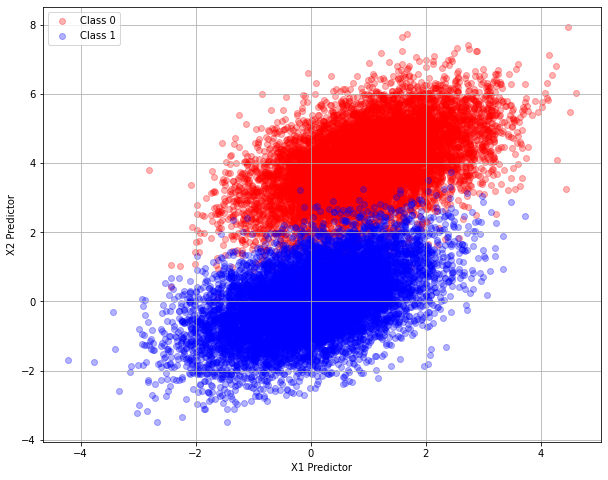

In [6]:
#Split dataframe based on class value and plot
classone = mydatabase[mydatabase['Class']<1.0]
classzero = mydatabase[mydatabase['Class']>0.0]
# plot the two classes as red and blue
plt.figure(figsize=(10, 8))
plt.scatter(classzero['X1'],classzero['X2'], c="red", alpha=0.3)
plt.scatter(classone['X1'],classone['X2'], c="blue", alpha=0.3)
plt.legend(["Class 0","Class 1"])
plt.xlabel('X1 Predictor') 
plt.ylabel('X2 Predictor') 
plt.grid(which='both')
plt.show()

The two classes appear different enough so the logistic-regression classification seems possible.  For example if the predictor input is $[0,0]$ then the class is likely "Class 1", whereas if the predictor input is $[0,4]$ then the class is likely "Class 0" according to the above plot.

#### Step 4 Employ `sklearn` to obtain a logistic regresion model

Here we use a package to actually pass a classification boundary between the two data clouds

**Prepare the Data to feed into sklearn**

In [7]:
#split dataset in features and target variable
feature_cols = ['X1', 'X2']
X = mydatabase[feature_cols] # Features
y = mydatabase["Class"] # Target variable

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [9]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

#### Step 5 Assess the fitted results using a confusion matrix

Compute the matrix, then render using a heat map style.

In [10]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
#cnf_matrix

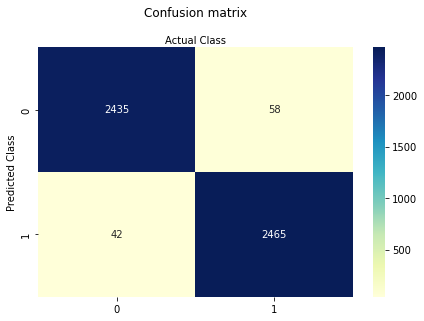

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted Class')
plt.xlabel('Actual Class');

#### Step 6 Build a Classifer Engine

Now lets build a classification (class prediction) engine using logistic regression results.  

First we need the sigmoid response function where 

$$sigmoid(X,\beta) = 1 + e^{{\beta}^TX} $$

In [118]:
def sigmoid(scores): # scores = b0+b1X1+b2X2+... where b0,b1,b2,... are specified
    return 1/(1+np.exp(-scores))

#### Employ the Classifier Engine

Now lets use our two obvious values from the discussion above

In [162]:
inputs = np.array([[0],[1]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,0))

X1 Input =  0 
X2 Input =  1 
Estimated Class Value 0.0


In [163]:
inputs = np.array([[0],[4]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,0))

X1 Input =  0 
X2 Input =  4 
Estimated Class Value 1.0


So now we have a classifer function, we could probably draw a dividing line back on the original plot and identify the dividing line,  we only need two points where the classifier returns a value of 0.5 as below

In [171]:
inputs = np.array([[-4],[0.645]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,3))

X1 Input =  -4.0 
X2 Input =  0.645 
Estimated Class Value 0.502


In [188]:
inputs = np.array([[4],[3.018]]) # one example input, should evaluate as
scores = np.dot(logreg.coef_,inputs) + logreg.intercept_
estimated_class = sigmoid(np.dot(logreg.coef_,inputs) + logreg.intercept_)[0,0] # grab the only element
print("X1 Input = ",inputs[0][0],"\nX2 Input = ",inputs[1][0],"\nEstimated Class Value",round(estimated_class,3))

X1 Input =  4.0 
X2 Input =  3.018 
Estimated Class Value 0.5


Our two points by trial and error are: $[-4.0,0.645]$ and $[4.0,3.018]$  we can add this line to our plot


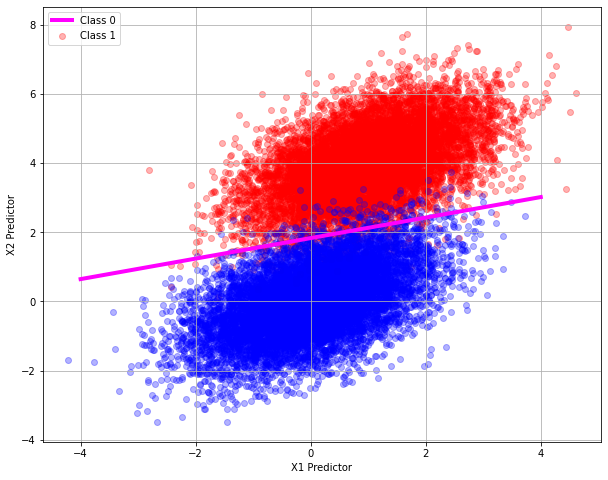

In [192]:
# plot the two classes as red and blue
plt.figure(figsize=(10, 8))
plt.scatter(classzero['X1'],classzero['X2'], c="red", alpha=0.3)
plt.scatter(classone['X1'],classone['X2'], c="blue", alpha=0.3)
plt.plot([-4,4],[0.645,3.018],c="magenta",linewidth=4)
plt.legend(["Class 0","Class 1"])
plt.xlabel('X1 Predictor') 
plt.ylabel('X2 Predictor') 
plt.grid(which='both')
plt.show()

## References